<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="orange">
تشخیص جنسیت
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    امروزه شبکه‌های اجتماعی کاربردهای گسترده‌ای دارند. اولین استفاده آن، تفریح و اوقات فراغت است. اما از دید دیگر، می‌توان از شبکه‌های اجتماعی برای پیدا کردن الگوهای رفتاری استفاده کرد. به عنوان مثال با تحلیل نظرات کاربران شبکه‌های اجتماعی می‌توانیم ضعف‌های کسب و کار خود را پیدا کنیم.
    <br>
    جنسیت یکی از پارامترهای تاثیرگذار در رفتار کاربران است. در مواجه با یک موضوع، بانوان عمدتا یک‌طور واکنش نشان خواهند داد و آقایان نیز طور دیگری!
    <br>
    حال در این پروژه قصد داریم با اطلاعاتی که دیتاک از کاربران توییتر و اینستاگرم در اختیار ما قرار داده است، جنسیت آن‌ها را پیش‌بینی کنیم.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنید.
</font>
</p>

In [1]:
import warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزش ۸۰۰۰ سطر و ۱۰ ستون دارد. در جدول زیر، اطلاعات بیشتری در مورد داده نوشته شده است.     
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|gender|جنسیت (ستون هدف)|
|age|بازه سنی کاربر|
|fullname|نامی که در پروفایل شبکه اجتماعی نوشته شده است |
|username|نام کاربری|
|biography|بیوگرافی شبکه اجتماعی کاربر|
|follower_count|تعداد دنبال‌کننده‌های کاربر|
|following_count|تعداد افرادی که کاربر را دنبال می‌کنند|
|is_business|کسب‌وکاری بودن حساب کاربری|
|is_verified|تایید شده بودن حساب کاربری|
|is_private|خصوصی بودن حساب کاربری|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ستون <code>age</code> متغیر پیوسته نیست؛ بلکه دسته‌های سنی را نشان می‌دهد. در جدول زیر نحوه نگاشت سن را مشاهده می‌کنیم.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|سن واقعی کاربران|عدد نگاشت شده|
|:------:|:---:|
|1|کمتر از ۱۸ سال|
|2|از ۱۹ تا ۲۹ سال|
|3|از ۳۰ تا ۴۰ سال|
|4|بالاتر از ۴۰ سال|
    
</font>
</div>
</center>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانیم. نمونه‌های آموزشی در فایل <code>train_data.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنیم در فایل <code>test_data.csv</code> ذخیره شده‌اند. 
</p>

In [3]:
train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')
train

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
0,man,2,Farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nGlory man...,1604.0,1407.0,0.0,0.0,0.0
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",67.0,501.0,0.0,0.0,0.0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"Having you, is all I wish for \nداشتنت، تمامِ...",0.0,0.0,0.0,0.0,0.0
3,woman,1,Lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.0,0.0,0.0,0.0,0.0
4,woman,2,Narsis Asadollahi,_l.aurora.l_,I am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,200.0,328.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,woman,2,Ŋεgɨŋ,negiiin_bahrmandi,﷽\nAllah IS Enough FoR Me?\n♥️?,0.0,0.0,0.0,0.0,0.0
7996,man,3,h🗯abdi🗯offìcial,h.abdi.official,حقوقی,0.0,0.0,1.0,0.0,0.0
7997,woman,2,⚜رویا احمدی⚜,roya.ahmadi.k,مهندس صنایع👩‍🔧🏭 Industrial engineer\nمعمار👩‍💻👷...,1260.0,1167.0,0.0,0.0,0.0
7998,man,3,لرستان &خرم اباد,erfanpouersif,khoramabad,0.0,0.0,0.0,0.0,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>



In [4]:
train.gender

0         man
1       woman
2       woman
3       woman
4       woman
        ...  
7995    woman
7996      man
7997    woman
7998      man
7999      man
Name: gender, Length: 8000, dtype: object

In [5]:
train.describe(include='all')

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
count,8000,8000.000000,8000,8000,8000,8000.000000,8000.00000,7997.000000,8000.000000,8000.000000
unique,2,NaN,7171,8000,7930,NaN,NaN,NaN,NaN,NaN
top,man,NaN,maryam,mr_gh_farshid,فقط خدا,NaN,NaN,NaN,NaN,NaN
freq,4000,NaN,28,1,5,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.659875,NaN,NaN,NaN,2745.200250,712.20650,0.103289,0.000125,0.000125
std,NaN,0.724228,NaN,NaN,NaN,20156.322638,1465.37601,0.304355,0.011180,0.011180
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,3.000000,NaN,NaN,NaN,124.000000,133.00000,0.000000,0.000000,0.000000
75%,NaN,3.000000,NaN,NaN,NaN,917.250000,681.00000,0.000000,0.000000,0.000000


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    توضیع مردان نسبت به زنان یکسان هست، لذا مجموعه داده متوازن است.
    <br>
    میانگین <code>is_private</code> و <code>is_verified</code>  نزدیک به صفر است، یعنی اکثر مقادیر این ستون ها صفر هستند
    <br>
    
</font>
</p>

In [6]:
train.nunique()

gender                2
age                   4
fullname           7171
username           8000
biography          7930
follower_count     2477
following_count    2055
is_business           2
is_verified           2
is_private            2
dtype: int64

In [7]:
train[train['is_private'] == 1]

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
4389,woman,2,Miss gh,banoo_gh1313,●━━━━♡łøvə ýøū───── \nMarried💍💎,710.0,378.0,NaN,0.0,1.0


In [8]:
train[train['is_verified'] == 1]

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
6966,woman,4,Nooshafarin نوش آفرين,nooshafarin.a,Nooshafarin official page\nصفحه رسمی نوش افرین,296244.0,118.0,1.0,1.0,0.0


In [9]:
train[train['is_business'] == 1].describe(include='all')

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
count,826,826.000000,826,826,826,826.000000,826.000000,826.0,826.000000,826.0
unique,2,NaN,817,826,826,NaN,NaN,NaN,NaN,NaN
top,man,NaN,alireza,officemehran,وی در خانواده مذهبی اعتقاد خود را از دست داد😀😀,NaN,NaN,NaN,NaN,NaN
freq,524,NaN,3,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.742131,NaN,NaN,NaN,11711.389831,1532.726392,1.0,0.001211,0.0
std,NaN,0.725362,NaN,NaN,NaN,46122.635507,2156.302881,0.0,0.034794,0.0
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000000,0.0
25%,NaN,2.000000,NaN,NaN,NaN,800.750000,129.000000,1.0,0.000000,0.0
50%,NaN,3.000000,NaN,NaN,NaN,2583.500000,614.000000,1.0,0.000000,0.0
75%,NaN,3.000000,NaN,NaN,NaN,8935.500000,1712.250000,1.0,0.000000,0.0


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پراکندگی مقادیر <code>is_private</code> و <code>is_verified</code>  مناسب نیست.
    <br>
    اکثر کسب کار ها آقایان اداره میکنند لذا برای پیش‌بینی متغییر هدف ویژگی مناسبی هست.

</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ویژگی های اضافی را حذف می‌کنیم.
    
</font>
</p>


In [10]:
train.drop(columns=['follower_count', 'following_count', 'is_verified',
           'is_private', 'username', 'age', 'biography'], inplace=True)
test.drop(columns=['follower_count', 'following_count', 'is_verified',
          'is_private', 'username', 'age', 'biography'], inplace=True)

In [11]:
train

,gender,fullname,is_business
0,man,Farshid,0.0
1,woman,zahr@72,0.0
2,woman,ms farahnaz♥,0.0
3,woman,Lena.mommy farzan,0.0
4,woman,Narsis Asadollahi,0.0
...,...,...,...
7995,woman,Ŋεgɨŋ,0.0
7996,man,h🗯abdi🗯offìcial,1.0
7997,woman,⚜رویا احمدی⚜,0.0
7998,man,لرستان &خرم اباد,0.0


In [12]:
train.isna().sum()

gender         0
fullname       0
is_business    3
dtype: int64

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مقادیر گمشده را با بیشترین تکرار پر میکنیم.

    
</font>
</p>


In [13]:
train.is_business.fillna(0.0, inplace=True)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ویژگی <code>fullname</code> به کمک توابع زیر به ریشه مناسب تبدیل میکنیم.
    <br>
    از کتابخانه <code>hazm</code> برای زبان فارسی و <code>nltk</code>  برای زبان انگلیسی استفاده میکنیم.
    
</font>
</p>


In [14]:
import string
from hazm import *
from hazm import stopwords_list
from nltk.tokenize.casual import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re


normalizer = Normalizer(persian_numbers=False, persian_style=False)
tokenizer = WordTokenizer(separate_emoji=True, replace_links=True, replace_ids=True,
                          replace_emails=False, replace_numbers=True, replace_hashtags=True)
stop_words_EN = set(stopwords.words('english'))
stop_words_FA = set(stopwords_list())

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
t = TweetTokenizer()


def pre_fast(text):

    # Decompose compatibility characters
    text = unicodedata.normalize("NFKD", text)

    # lowercase_text(text)
    text = text.lower()

    text = re.sub(r'\d+', '', text)

    # remove_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))

    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~؟!.،,?'''

    # Removing punctuations in string
    # Using loop + punctuation string
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")

    punc = '''\u200d♂️٪'🏻','''
    # Removing punctuations in string
    # Using loop + punctuation string
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")

    text = normalizer.normalize(text)

    # Remove_stop_words_English and Remove_stop_words_Farsi and Lemmatizer_Farsi and Stemmer_English
    # romove number

    text = re.sub(r'\d+', '', text)
    words = tokenizer.tokenize(text)
    text = ' '.join(words)
    words = t.tokenize(text)

    words = [lemmatizer.lemmatize(stemmer.stem(
        word)) for word in words if word not in (stop_words_EN | stop_words_FA)]

    text = ' '.join(words)

    punc = '''\u200c'''

    # Removing punctuations in string
    # Using loop + punctuation string
    for ele in text:
        if ele in punc:
            text = text.replace(ele, " ")

    text = re.sub(r'\d+', '', text)
    words = tokenizer.tokenize(text)
    text = ' '.join(words)
    words = t.tokenize(text)
    words = t.tokenize(text)

    words = [lemmatizer.lemmatize(stemmer.stem(
        word)) for word in words if word not in (stop_words_EN | stop_words_FA)]

    text = ' '.join(words)

    text = normalizer.normalize(text)
    # remove_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))

    text = text.replace('''\u200c''', " ")
    text = text.replace('\u200c', " ")

    global A

    return text

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    به کمک <code>TfidfVectorizer</code> متن به بردارهای عددی تبدیل میکنیم.
    
</font>
</p>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


corpus = train['fullname']
tfidf_vect_fullname = TfidfVectorizer(preprocessor=pre_fast, min_df=2)
final_counts_fullname = tfidf_vect_fullname.fit_transform(corpus)

print(tfidf_vect_fullname.get_feature_names_out())
print(final_counts_fullname.toarray()[0])
print(final_counts_fullname.toarray()[1])

['aba' 'abadi' 'abba' ... 'რσძ' 'みα' '乙ム']
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [16]:
tfidf_vect_fullname.get_feature_names_out()

array(['aba', 'abadi', 'abba', ..., 'რσძ', 'みα', '乙ム'], dtype=object)

In [17]:
test_biography = test['fullname']
test_counts_fullname = tfidf_vect_fullname.transform(test_biography)

In [18]:
final_counts_fullname.toarray().shape

(8000, 1235)

In [19]:
test_counts_fullname.toarray().shape

(2000, 1235)

In [20]:
train_data = pd.DataFrame(final_counts_fullname.toarray())
test_data = pd.DataFrame(test_counts_fullname.toarray())
train_data

,0,1,2,3,4,5,6,7,8,9,...,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مقادیر غیر عددی را به عددی تبدیل میکنیم.

</font>
</p>


In [21]:
train.drop(columns=['fullname'], inplace=True)

train['gender'].replace({'woman': 0, 'man': 1}, inplace=True)
train

,gender,is_business
0,1,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
7995,0,0.0
7996,1,1.0
7997,0,0.0
7998,1,0.0


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
دیتا نهایی را برای مدل سازی میسازیم.

</font>
</p>


In [22]:
test.drop(columns=['fullname'], inplace=True)

In [23]:
concatenated_test_data = pd.concat([test, test_data], axis=1)
concatenated_test_data.columns = concatenated_test_data.columns.astype(str)
concatenated_test_data

,is_business,0,1,2,3,4,5,6,7,8,...,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
concatenated_train_data = pd.concat([train, train_data], axis=1)
concatenated_train_data.columns = concatenated_train_data.columns.astype(str)
concatenated_train_data

,gender,is_business,0,1,2,3,4,5,6,7,...,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


--------------------------------------------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی جدا میکنیم.

</font>
</p>



In [25]:
from sklearn.model_selection import train_test_split
X = concatenated_train_data.drop(columns=['gender']).to_numpy()
y = concatenated_train_data['gender'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده، وقت آن است که مدلی آموزش دهیم که بتواند متغیر هدف این مسئله را با بیشترین دقت پیش‌بینی کند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    از تعدادی الگوریتم ماشین لرنینگ معمولی مثل XGBoost ،Decision Tree ،Naive Bayes ،SVM ،Logistic Regression و  AdaBoost    استفاده می‌کنیم.
        <br>
     سپس دقت هر مدل را نمایش میدهیم.

</font>
</p>



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix


# List of models
models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]


# Fit models and print classification report
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model.__class__.__name__+' Report:')
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(model.__class__.__name__+' Confusion Matrix:')
    print(cm)
    print('\n')

LogisticRegression Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       801
           1       0.92      0.69      0.79       799

    accuracy                           0.81      1600
   macro avg       0.83      0.81      0.81      1600
weighted avg       0.83      0.81      0.81      1600

LogisticRegression Confusion Matrix:
[[752  49]
 [250 549]]




SVC Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       801
           1       0.89      0.69      0.78       799

    accuracy                           0.80      1600
   macro avg       0.82      0.80      0.80      1600
weighted avg       0.82      0.80      0.80      1600

SVC Confusion Matrix:
[[730  71]
 [246 553]]


GaussianNB Report:
              precision    recall  f1-score   support

           0       0.92      0.53      0.67       801
           1       0.67      0.95      0.78       799

    accuracy                           0.74      1600
   macro avg       0.79      0.74      0.73      1600
weighted avg       0.79      0.74      0.73      1600

GaussianNB Confusion Matrix:
[[422 379]
 [ 38 761]]


DecisionTreeClassifier Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       801
           1       0.90      0.68      0.77       799

    accuracy       

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
     مدل LogisticRegression با 0.81 = f1-score بیشترین دقت را تا الان دارد.

</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
  با استفاده از الگوریتم Stack generalization بررسی میکنیم، دقت ترکیب همشون بهتر از تک تکشون میشود یا خیر.

</font>
</p>



In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Define the base models
base_models = [
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier()),
    ('xgb', XGBClassifier()),
    ('ab', AdaBoostClassifier())
]

# Define the meta-model 
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Print the classification report for the stacking classifier
print("Stacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stacking))


# print the confusion matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix for Stacking Classifier:")
print(conf_matrix_stacking)

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       801
           1       0.92      0.69      0.79       799

    accuracy                           0.81      1600
   macro avg       0.83      0.81      0.81      1600
weighted avg       0.83      0.81      0.81      1600

Confusion Matrix for Stacking Classifier:
[[750  51]
 [245 554]]



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ترکیب الگوریتم ها دقت را کمی افزایش داد.
        <br>
مدل stacking_classifier با 0.81 = f1-score بیشترین دقت را تا الان دارد.
</font>
</p>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
  چند روش عمیق را تست می‌کنیم و با مدل های قبلی مقایسه می‌کنیم.

</font>
</p>



Epoch 1/30
22/22 [==============================] - 2s 29ms/step - loss: 0.6682 - accuracy: 0.6313 - val_loss: 0.5241 - val_accuracy: 0.7458
Epoch 2/30
22/22 [==============================] - 0s 18ms/step - loss: 0.3788 - accuracy: 0.7996 - val_loss: 0.4440 - val_accuracy: 0.7708
Epoch 3/30
22/22 [==============================] - 0s 12ms/step - loss: 0.3054 - accuracy: 0.8072 - val_loss: 0.4297 - val_accuracy: 0.7740
Epoch 4/30
22/22 [==============================] - 0s 13ms/step - loss: 0.2836 - accuracy: 0.8221 - val_loss: 0.4403 - val_accuracy: 0.7271
Epoch 5/30
22/22 [==============================] - 0s 17ms/step - loss: 0.2781 - accuracy: 0.8154 - val_loss: 0.4335 - val_accuracy: 0.7760
Epoch 6/30
22/22 [==============================] - 0s 13ms/step - loss: 0.2756 - accuracy: 0.8200 - val_loss: 0.4380 - val_accuracy: 0.7792
Epoch 7/30
22/22 [==============================] - 0s 13ms/step - loss: 0.2736 - accuracy: 0.8208 - val_loss: 0.4502 - val_accuracy: 0.7260
Epoch 8/30
22

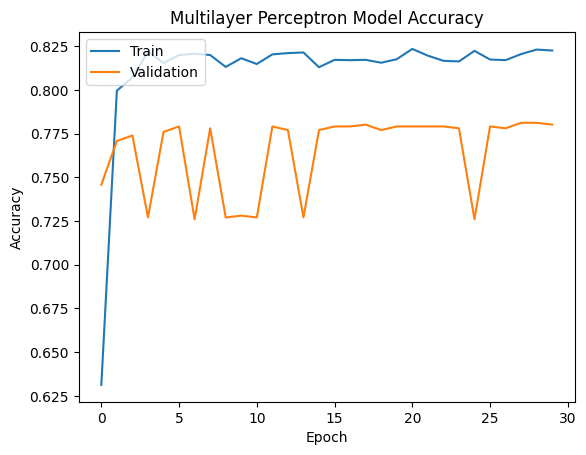

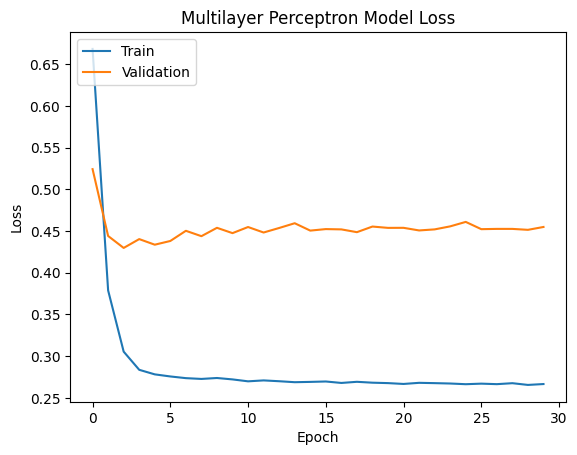


Multilayer Perceptron Evaluation:
50/50 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       801
           1       0.87      0.66      0.75       799

    accuracy                           0.78      1600
   macro avg       0.80      0.78      0.78      1600
weighted avg       0.80      0.78      0.78      1600


Confusion Matrix for Multilayer Perceptron:
 [[723  78]
 [271 528]]


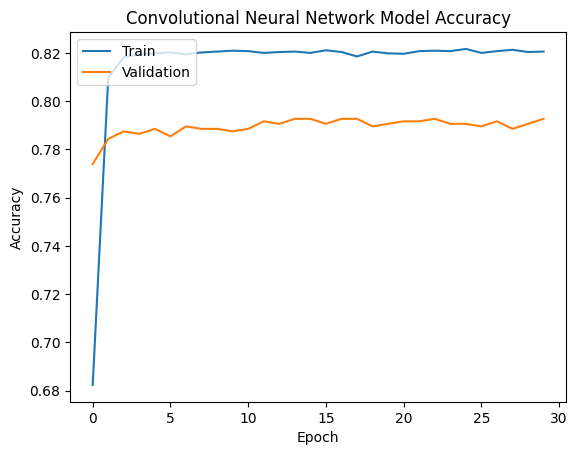

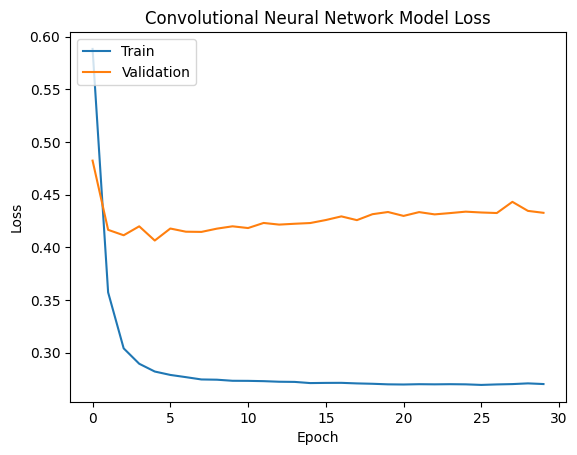


Convolutional Neural Network Evaluation:
50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       801
           1       0.89      0.68      0.77       799

    accuracy                           0.80      1600
   macro avg       0.82      0.80      0.80      1600
weighted avg       0.82      0.80      0.80      1600


Confusion Matrix for Convolutional Neural Network:
 [[732  69]
 [253 546]]


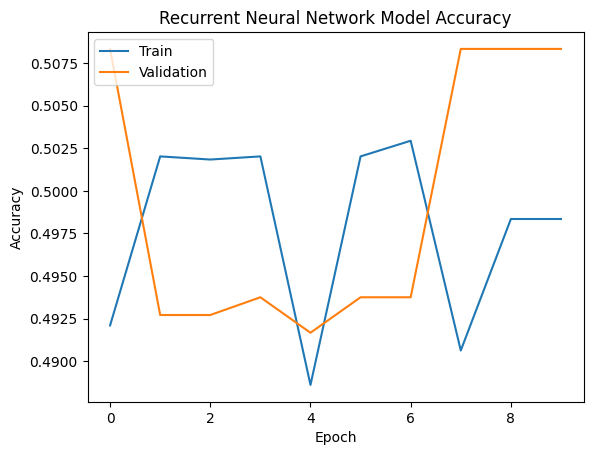

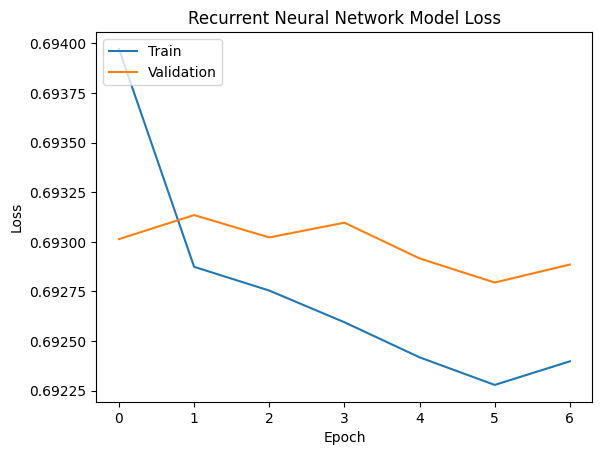


Recurrent Neural Network Evaluation:
50/50 [==============================] - 10s 193ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       801
           1       0.00      0.00      0.00       799

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600


Confusion Matrix for Recurrent Neural Network:
 [[801   0]
 [799   0]]


In [28]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_columns = X_train[0].size


# Model 1: Multilayer Perceptron (MLP)
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(num_columns,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model with history for plotting
history_mlp = model_mlp.fit(
    X_train, y_train, epochs=30, batch_size=256, validation_split=0.15)

# Model 2: Convolutional Neural Network (CNN)
X_train_cnn = X_train.reshape(-1, num_columns, 1)
X_test_cnn = X_test.reshape(-1, num_columns, 1)

model_cnn = Sequential([
    Conv1D(16, kernel_size=2, activation='relu', input_shape=(num_columns, 1)),
    Flatten(),

    Dense(2, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with history for plotting
history_cnn = model_cnn.fit(
    X_train_cnn, y_train, epochs=30, batch_size=256, validation_split=0.15)


# Model 3: Recurrent Neural Network (RNN)
model_rnn = Sequential([
    LSTM(64, activation='relu', input_shape=(num_columns, 1)),
    Dense(2, activation='softmax')
])

model_rnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model with history for plotting
history_rnn = model_rnn.fit(
    X_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.15)


# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n{model_name} Evaluation:")

    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n", cm)


def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# Plot loss and accuracy for MLP
plot_training_history(history_mlp, "Multilayer Perceptron")
# Evaluate the MLP model
evaluate_model(model_mlp, X_test, y_test, "Multilayer Perceptron")


# Plot loss and accuracy for CNN
plot_training_history(history_cnn, "Convolutional Neural Network")
# Evaluate the CNN model
evaluate_model(model_cnn, X_test_cnn, y_test, "Convolutional Neural Network")


# Plot loss and accuracy for RNN
plot_training_history(history_rnn, "Recurrent Neural Network")
# Evaluate the RNN model
evaluate_model(model_rnn, X_test_cnn, y_test, "Recurrent Neural Network")

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
  با توجه به محدود بودن منابع پردازشی یادگیری را در مراحل اولیه متوقف کردیم.
  <br>
    بیشترین دقت را، در روش های یادگیری عمیق مدل  CNN با 0.80 = f1-score  دارد.


</font>
</p>



--------------

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
  با استفاده از الگوریتم Stack generalization دو مدل کلاسیک یادگیری ماشین را با یک مدل یادگیری عمیق ترکیب میکنیم.

</font>
</p>



In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('mlp', MLPClassifier(batch_size=256, solver='adam')),
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Print the classification report for the stacking classifier
print("Stacking Classifier Classification with MLP Report:")
print(classification_report(y_test, y_pred_stacking))


# print the confusion matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix for Stacking Classifier with MLP:")
print(conf_matrix_stacking)

Stacking Classifier Classification with MLP Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       801
           1       0.92      0.70      0.79       799

    accuracy                           0.82      1600
   macro avg       0.84      0.82      0.81      1600
weighted avg       0.84      0.82      0.81      1600

Confusion Matrix for Stacking Classifier with MLP:
[[750  51]
 [242 557]]


------------

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="red">
 ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    با توجه به تعداد داده های آموزشی و محدودیت منابع پردازشی،
 مدل stacking_classifier(به همراه مدل عمیق) با 0.82 = f1-score بیشترین دقت را دارد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی، مدلسازی و بررسی انواع الگوریتم‌ها  که می‌توانند ما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    وقت آن رسیده است از مدلی که بیشترین دقت را دارد برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنیم و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنیم.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|gender|جنسیت کاربر|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>gender</i> است و ۲۰۰۰ سطر است.

</font>
</p>




In [30]:
pred = stacking_classifier.predict(concatenated_test_data)

In [31]:
submission = pd.DataFrame(pred,columns=['gender'])
submission['gender'].replace({0:'woman', 1:'man'},inplace=True)

submission

,gender
0,man
1,man
2,man
3,woman
4,woman
...,...
1995,man
1996,man
1997,woman
1998,woman
